In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### <u>Salary Distribution in the United States by top 6 Job Roles<u>

In [2]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()

In [6]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [7]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)].copy()

In [23]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

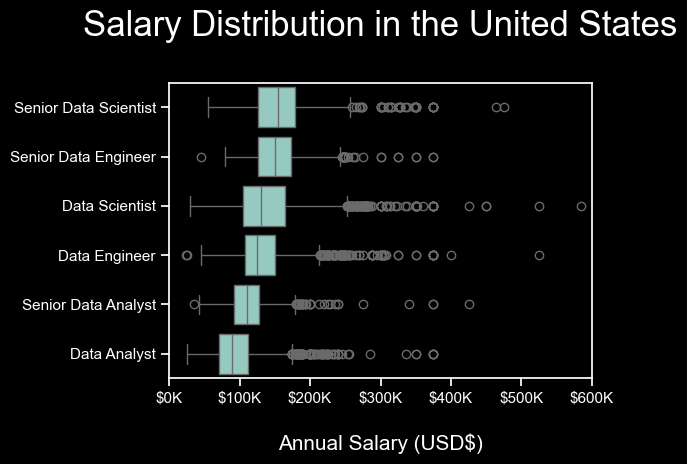

In [25]:
sns.set_theme(style='ticks')
plt.style.use('dark_background')
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order= job_order)

plt.title('Salary Distribution in the United States\n', fontsize=25)
plt.xlabel('\nAnnual Salary (USD$)', fontsize=15)
plt.ylabel('')
plt.xlim(0, 600000)

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.tight_layout()
plt.show()

---
### <u> Median Salary vs Skills for Data Analyst<u>

In [29]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [32]:
df_DA_US = df_DA_US.explode('job_skills')

In [ ]:
# Fetching the top paying skills
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median',ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [50]:
# Fetching the top popular skills
df_DA_top_popular = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_top_popular = df_DA_top_popular.head(10).sort_values(by='median', ascending=False)

In [51]:
df_DA_top_popular

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


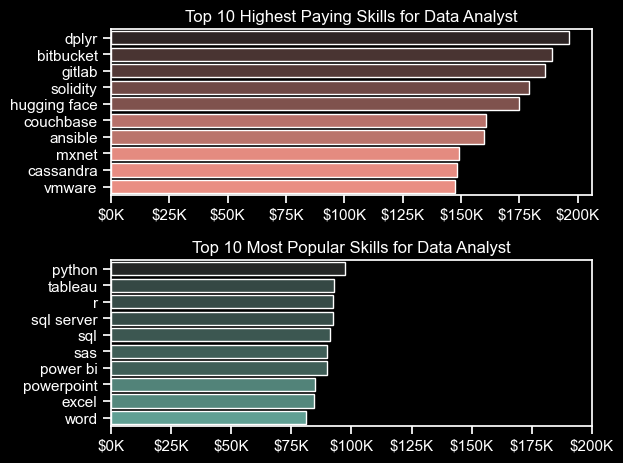

In [68]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')
plt.style.use('dark_background')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:salmon_r' , legend=False)
ax[0].set_title('Top 10 Highest Paying Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'${int(val/1000)}K'))



sns.barplot(data=df_DA_top_popular, x='median', y=df_DA_top_popular.index, ax=ax[1], hue='median', palette='dark:#5A9_r', legend=False)
ax[1].set_title('Top 10 Most Popular Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'${int(val/1000)}K'))
ax[1].set_xlabel('')
ax[1].set_xlim(0, 200000)

plt.tight_layout()
plt.show()